## Results

Here we tested 1 turtle per run, with varying window of movements. All agents started at the same location (-79,26), and ran for 150 days.

In [9]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import LineString
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.lines as mlines
import numpy as np
import pandas as pd

In [1]:
df = pd.read_csv('expiriment_results.csv')
df.head()

,RunId,iteration,Step,num_agents,deg_min,deg_max,seed,AgentID,lon,lat
0,0,0,0,1,0,360,42,NaN,NaN,NaN
1,0,0,1,1,0,360,42,1.0,-78.990167,25.995732
2,0,0,2,1,0,360,42,1.0,-79.000326,26.000418
3,0,0,3,1,0,360,42,1.0,-79.011399,25.998868
4,0,0,4,1,0,360,42,1.0,-79.023114,25.995703


In [33]:
cases = [
    (0,   360),
    (0,   180),
    (180, 360),
    (45,  135),
    (225, 315),
    (330, 360),
]

df_cases = []
for deg_min, deg_max in cases:
    df_cases.append(df[(df['deg_min'] == deg_min) & (df['deg_max'] == deg_max)])

In [31]:
def data_to_plot(df, case):
    """
    Takes the datafram and makes a plot. 
    """

    data = df.dropna(subset=['lon', 'lat'])
    gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['lon'], df['lat']), crs="EPSG:4326")

    # Get unique seeds
    seeds = sorted(gdf['seed'].unique())

    # Color and marker style maps
    colors = cm.get_cmap('tab10', len(seeds))

    # Plot
    fig, ax = plt.subplots(figsize=(12, 12*1.6))

    for i, seed in enumerate(seeds):
        sub = gdf[gdf['seed'] == seed]
        sub.plot(ax=ax,
                color=colors(i),
                markersize=30,
                marker='o',
                label=f"Seed {seed}")

    # Custom legend
    handles = [
        mlines.Line2D([], [], color=colors(i),marker='o', linestyle='None', markersize=10, label=f"Seed {seed}")
        for i, seed in enumerate(seeds)
    ]

    ax.legend(handles=handles, fontsize='small')
    ax.set_title(f"Agent Points by Seed With Angle Range: ({case[0]},{case[1]})")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    plt.tight_layout();
    plt.savefig(f'figures_overview/{case[0]}_{case[1]}_agent_pnt_plot.png');

## Generate Plots

/tmp/ipykernel_86046/122737427.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(seeds))
/tmp/ipykernel_86046/122737427.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(seeds))
/tmp/ipykernel_86046/122737427.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap('tab10', len(seeds))
/tmp/ipykernel_86046/122737427.py:13: MatplotlibDeprecationWarning: The get_cmap functio

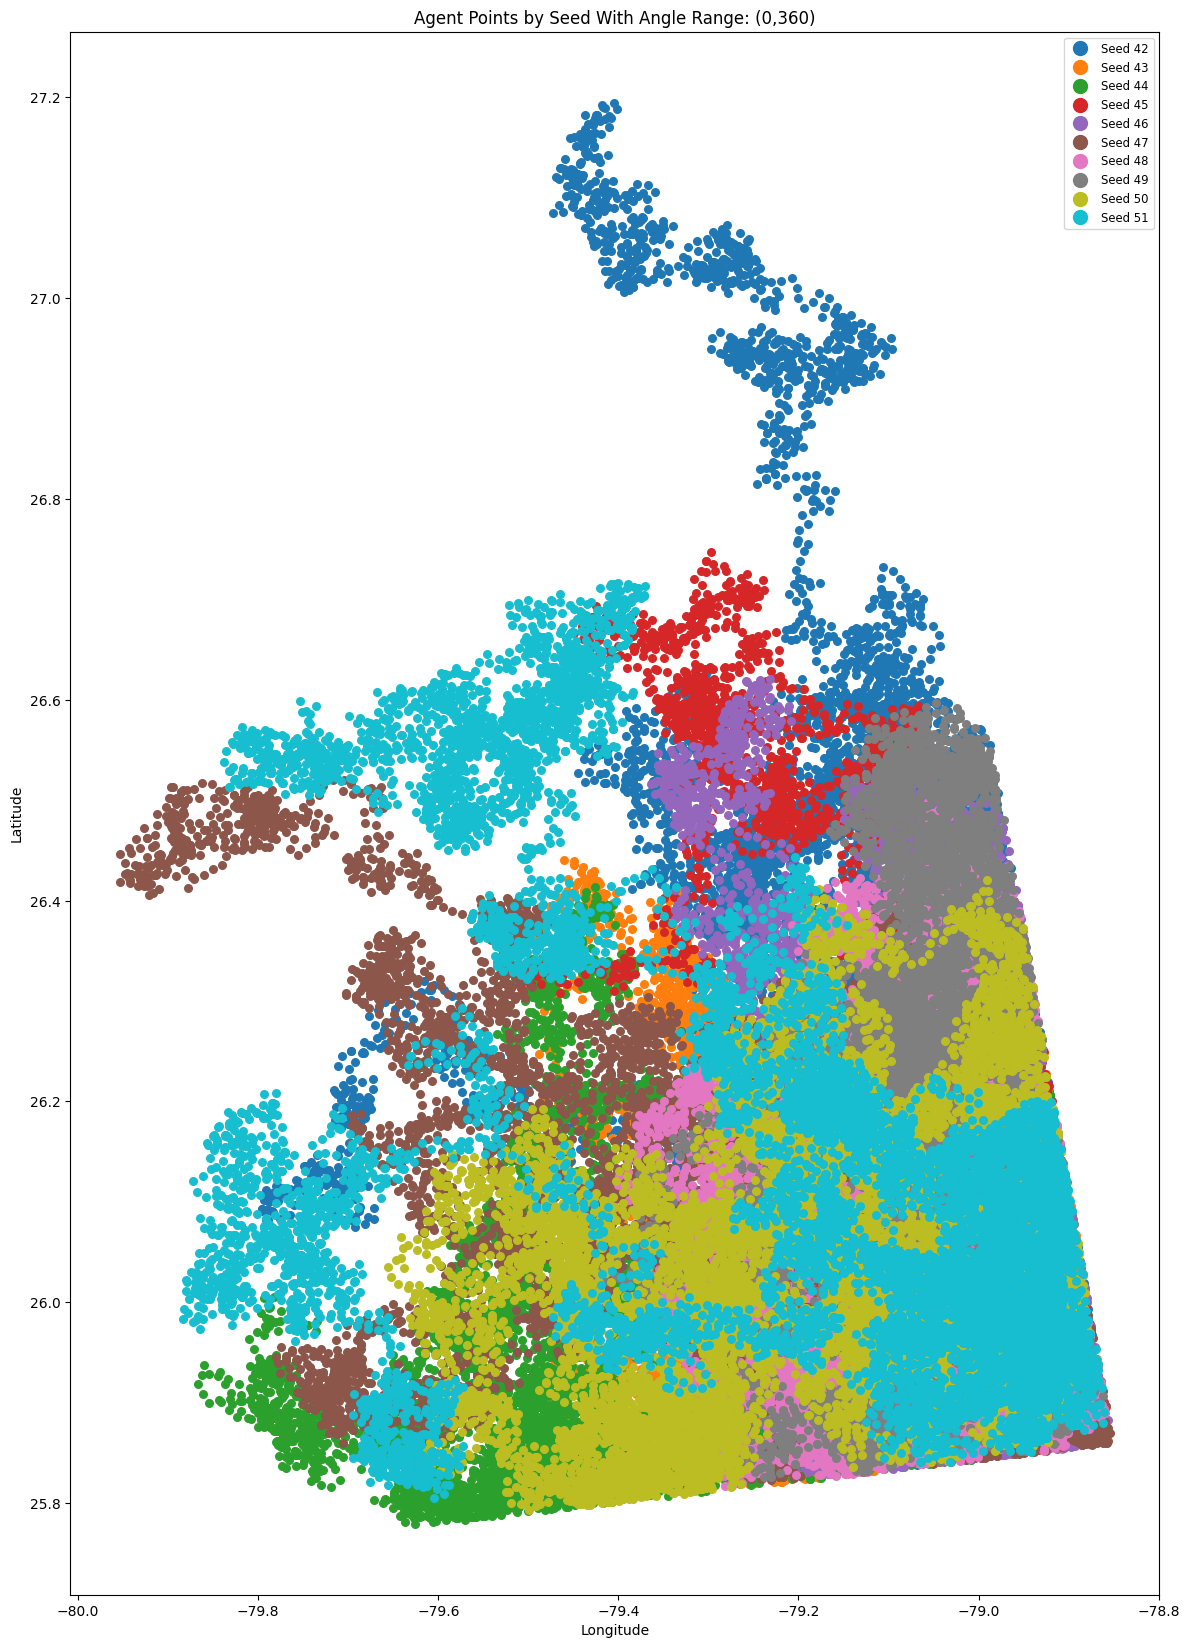

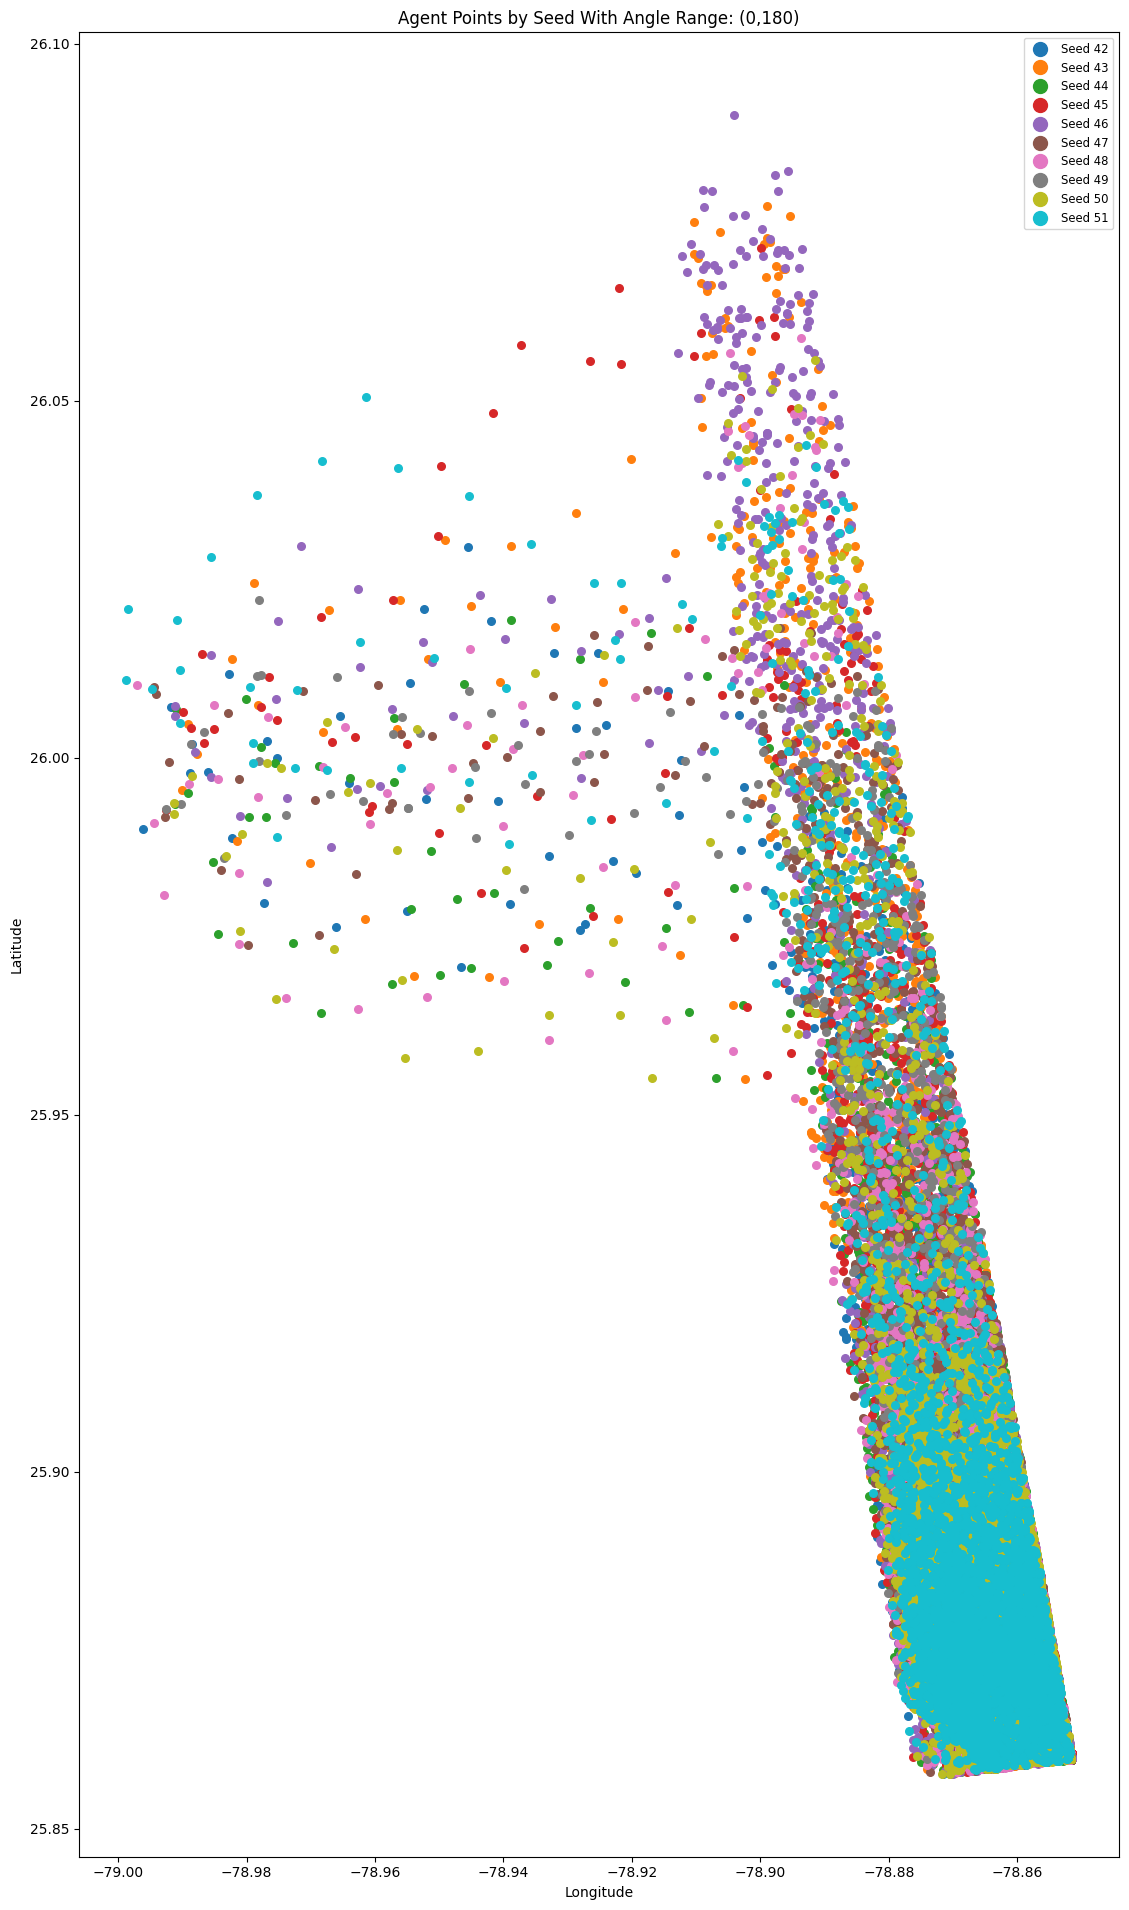

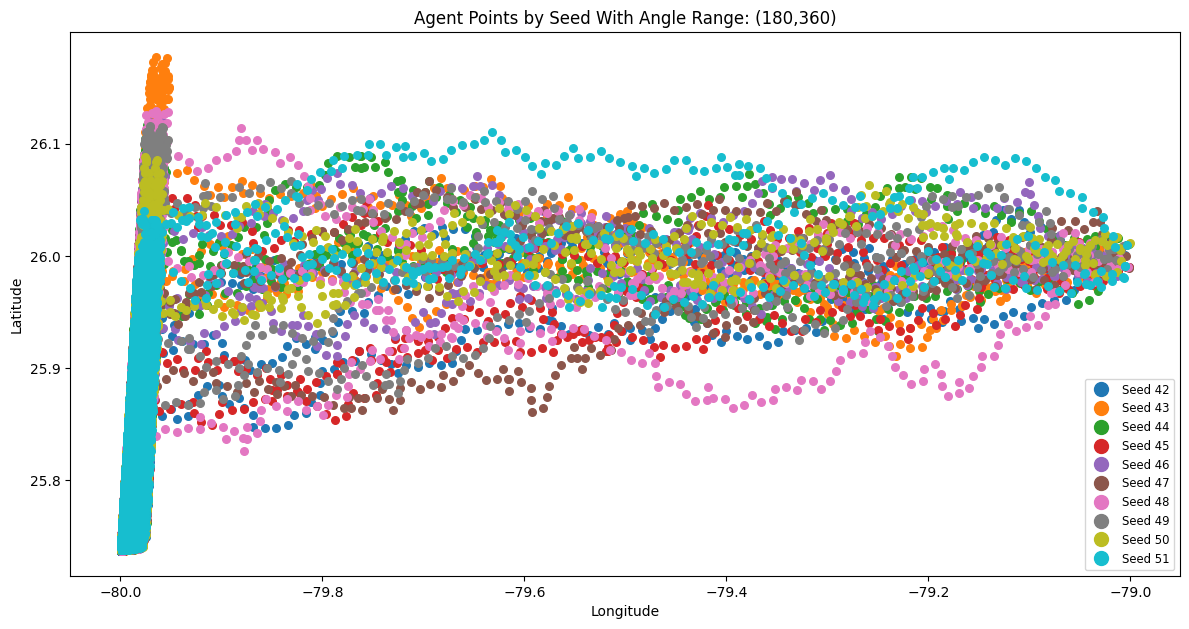

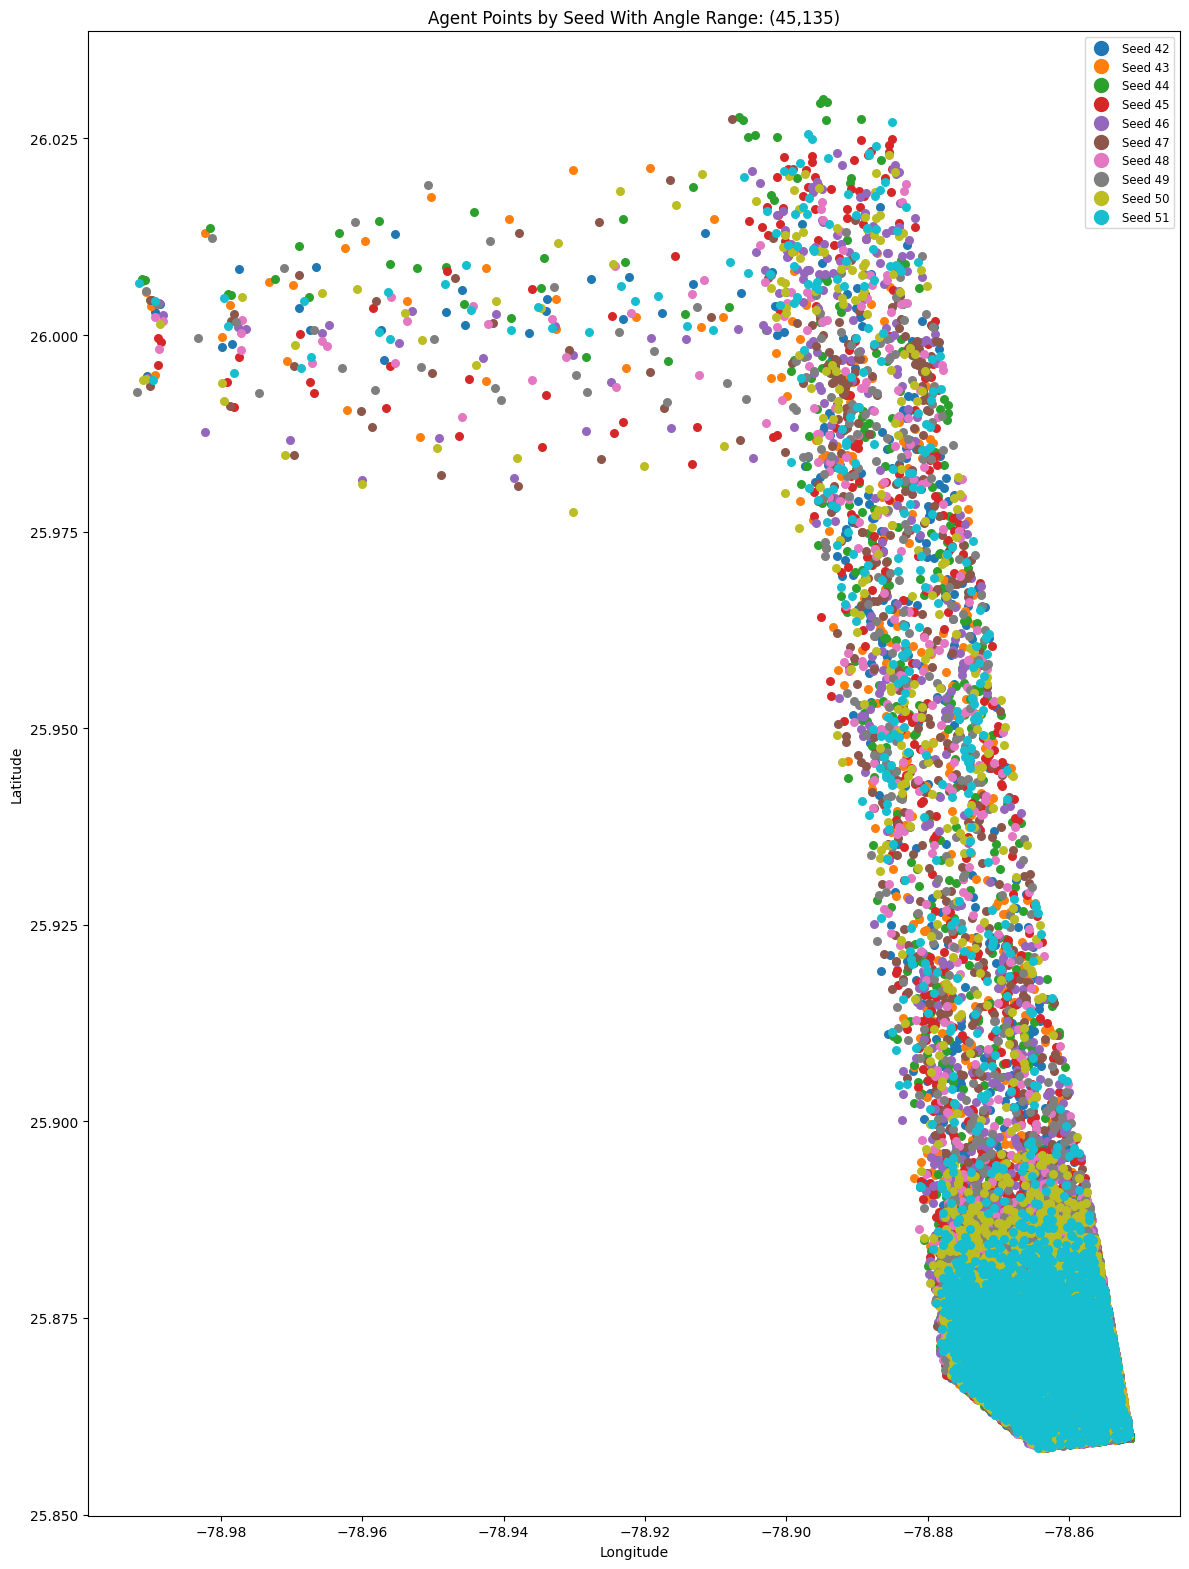

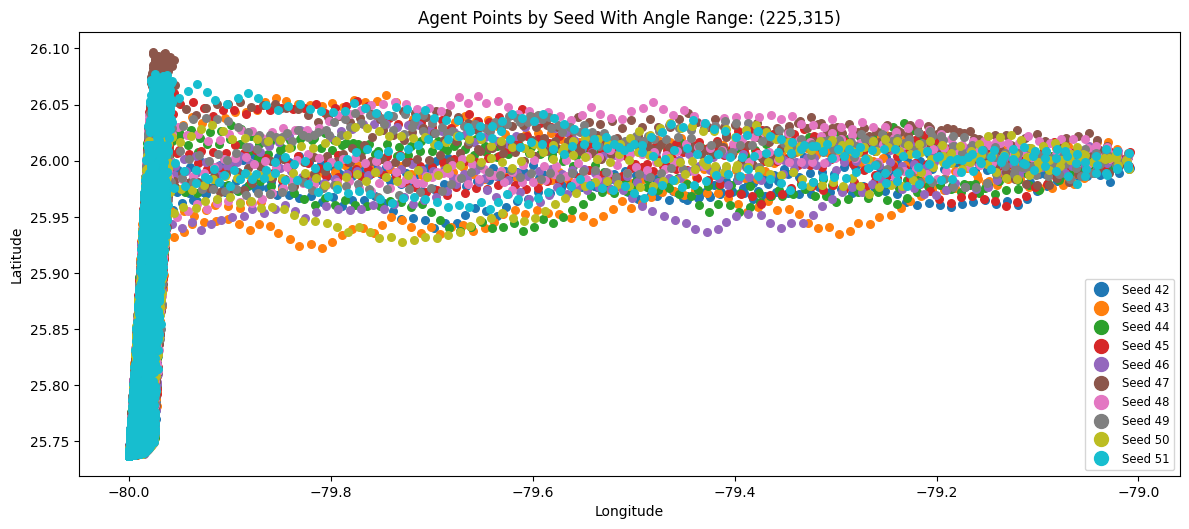

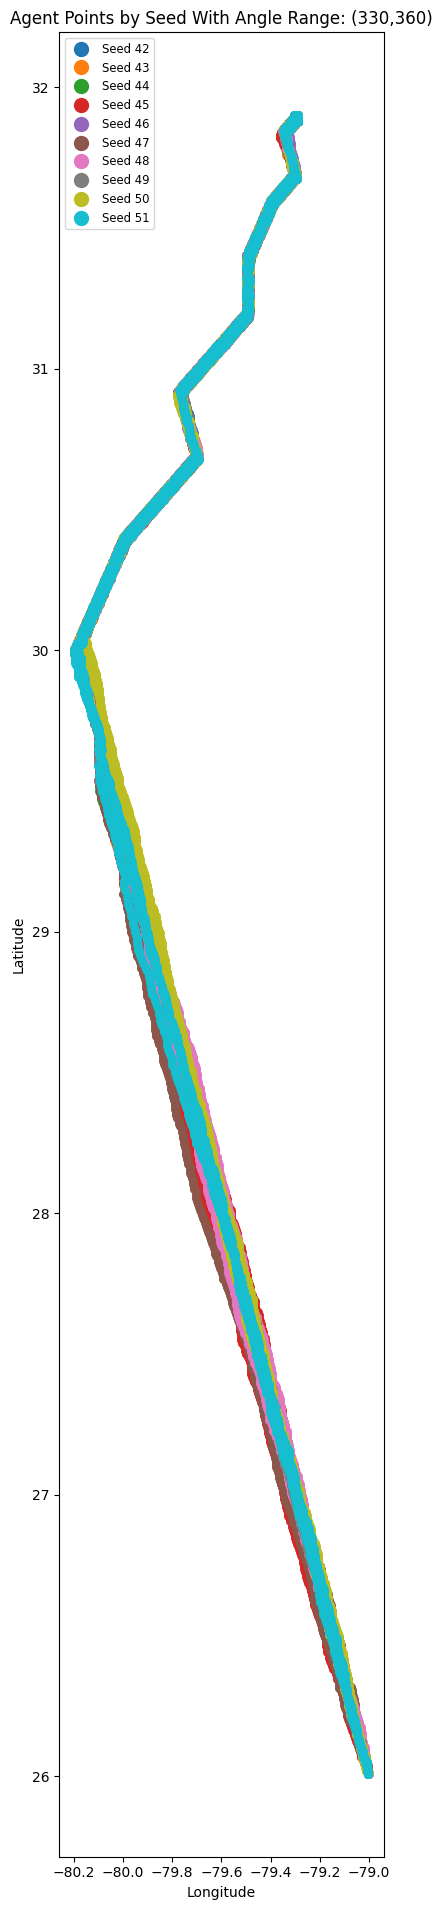

In [32]:
for count, data in enumerate(df_cases):
    data_to_plot(data, cases[count])